# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Title | Titanic - Machine Learning from Disaster</p>


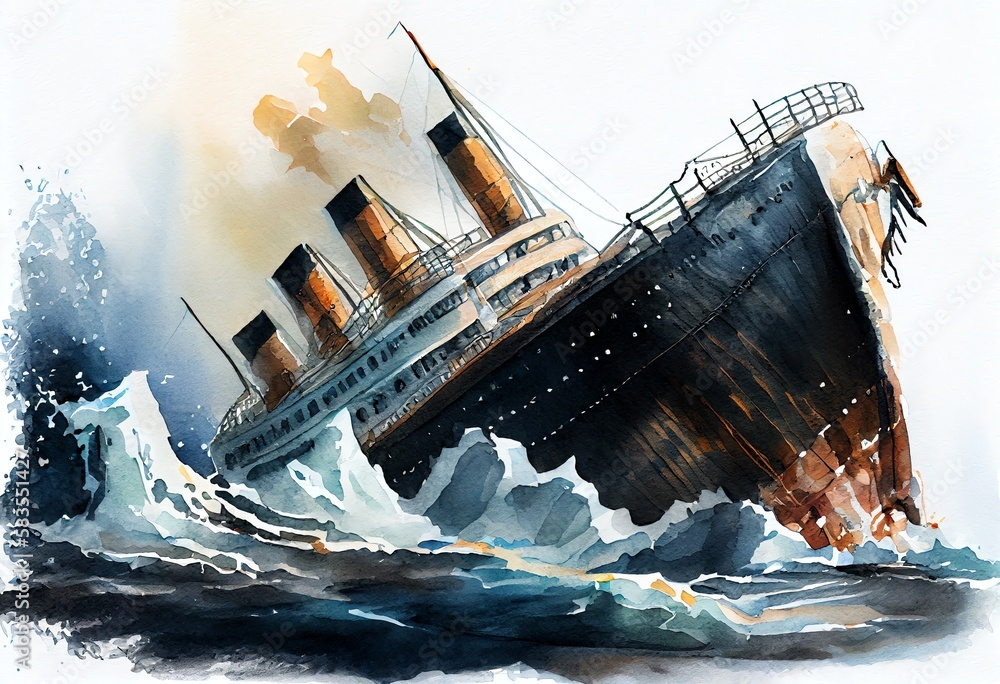

## About Dataset

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Column Descriptions:

`Survived:` Survival 0 = Dead and  1 = Survived

`Pclass:` class 1 = 1st (Upper), 2 = 2nd (Middle) and 3 = 3rd (Lower)

 `Sex:` Male and Female

`Age:` Age in years

`SibSp:` No. of siblings / spouses

-  Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

`Parch:` No. of parents / children

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

`Ticket:` Ticket number

`Fare:` Passenger's fare

`Cabin:` Cabin number

`Embarked:` Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Purpose of Analysis

The purpose of this notebook is Exploratory Data Analysis (EDA) and predict survival using diverse Machine Learning (ML) Models and choose the best model based on accuracy score.

`Here is the list of models that I have used:`

1. Logistics Regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. KNeighbors Classifier
5. RandomForestClassifier
6. AdaBoostClassifier
7. GradientBoostingClassifier
8. CatboostClassifier
9.  XGClassifier 
10. GaussianNB

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 1 | Import Necessary Liberaries</p>

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px

# SimpleImputer for imputiong missing values
from sklearn.impute import SimpleImputer

# Iterative Imputer for imputing missing values using ML models
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For normalization
from sklearn.preprocessing import QuantileTransformer

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Evaluation metrics for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model saving
import pickle

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 2 | Load the Dataset</p>

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 3 | Basic Information About the Dataset</p>

In [3]:
# Let's see any 5 values of the dataset
df_train.sample(5)

PassengerId  Survived  Pclass  \
539          540         1       1   
222          223         0       3   
366          367         1       1   
454          455         0       3   
434          435         0       1   

                                                 Name     Sex   Age  SibSp  \
539                Frolicher, Miss. Hedwig Margaritha  female  22.0      0   
222                           Green, Mr. George Henry    male  51.0      0   
366  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  female  60.0      1   
454                               Peduzzi, Mr. Joseph    male   NaN      0   
434                         Silvey, Mr. William Baird    male  50.0      1   

     Parch    Ticket   Fare Cabin Embarked  
539      2     13568  49.50   B39        C  
222      0     21440   8.05   NaN        S  
366      0    110813  75.25   D37        C  
454      0  A/5 2817   8.05   NaN        S  
434      0     13507  55.90   E44        S

In [4]:
print(f"The shape of training dataset is {df_train.shape} in which we have {df_train.shape[0]} rows and {df_train.shape[1]} columns.") 

print('---------------------------------------------------------------------------------------')

print(f"The shape of training dataset is {df_test.shape} in which we have {df_test.shape[0]} rows and {df_test.shape[1]} columns.") 

The shape of training dataset is (891, 12) in which we have 891 rows and 12 columns.
---------------------------------------------------------------------------------------
The shape of training dataset is (418, 11) in which we have 418 rows and 11 columns.


## 3.1 Training Dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **5 Columns of int64 dtype**
          1.  PassengerID
          2.  Survived
          3.  Pclass
          4.  Sibsp
          5.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Embarked` Columns.


## 3.2 Testing Dataset

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### 3.2.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **4 Columns of int64 dtype**
          1.  PassengerID
          2.  Pclass
          3.  Sibsp
          4.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Fare` Columns.


# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 4 | Dealing with Missing Values</p>

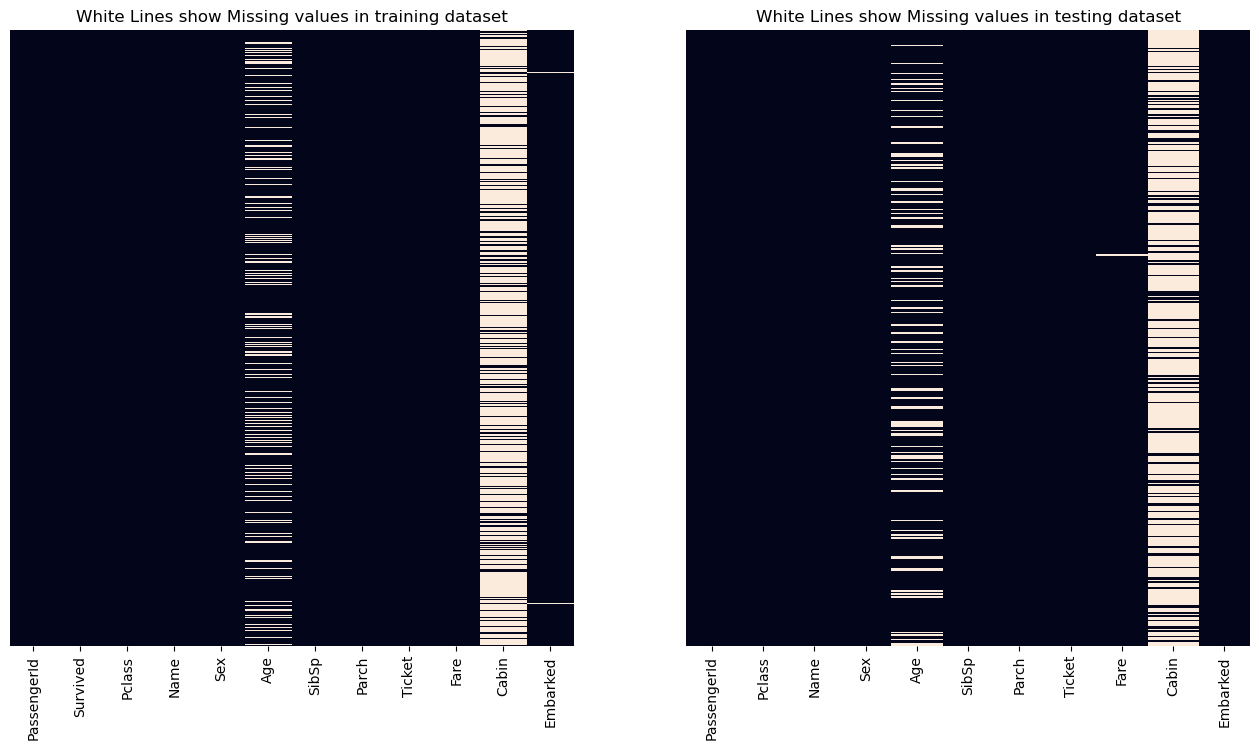

In [7]:
# Let's see the missing values in heatmap
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

In [8]:
# Let's see the percentage of missing values in training dataset upto 2 decimal points
missing_values_per = round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)
print(missing_values_per)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


### 4.1.1 Observations
-  Missing values in `Cabin, Age and Embarked` are `77.10%, 19.87% and 0.22%` respectively.

In [9]:
# Let's see the percentage of missing values in testing dataset upto 2 decimal points
missing_values_per = round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)
print(missing_values_per)

Cabin          78.23
Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64


### 4.1.2 Observations
-  Missing values in `Cabin, Age and Fare` are `78.23%, 20.57% and 0.24%` respectively.

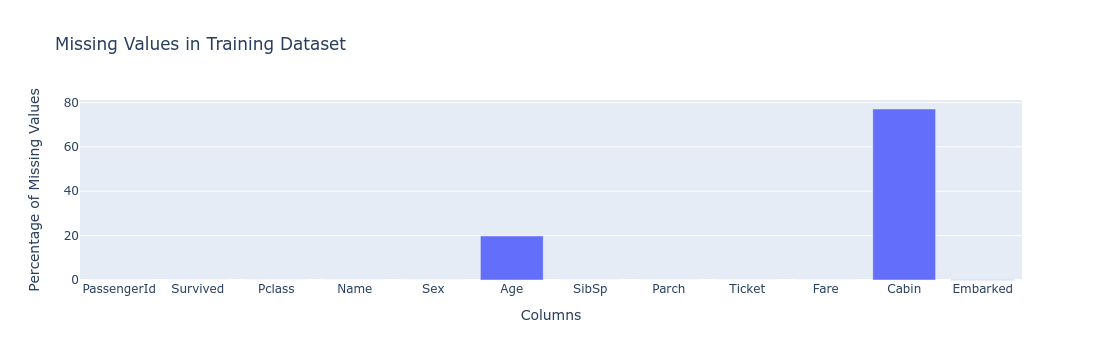

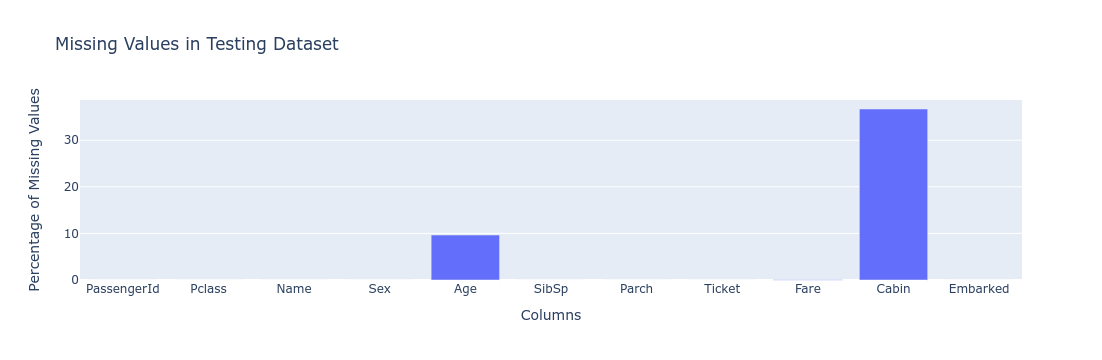

In [10]:
# Let's plot missing values

# Plot the missing values in the training dataset
fig1 = px.bar(x=df_train.columns, y=df_train.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Training Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig1.show()

# Plot the missing values in the testing dataset
fig2 = px.bar(x=df_test.columns, y=df_test.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Testing Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig2.show()

### 4.1.3 Observations
- We can see that `most missing values` in `Cabin Column`.
- So, let's `drop` that column from our dataset.

## 4.2 Drop the Cabin Column

In [11]:
# Dropping Cabin Column from traing and testing datasets 
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

In [12]:
# Again let's check the missing values in traing dataset
round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)

Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [13]:
# Again let's check the missing values in testing dataset
round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)

Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64

## 4.3 Impute Missing Values in Training Dataset

In [14]:
# Impute missing values in training data set
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [15]:
# Let's check again missing values in training dataset
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4.4 Impute Missing Values in Testing Dataset

In [16]:
# Impute missing values in testing data set
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [17]:
# Let's check again missing values in testing dataset
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.5 Observations
- We `successfully imputed` all the missing values from the dataset.

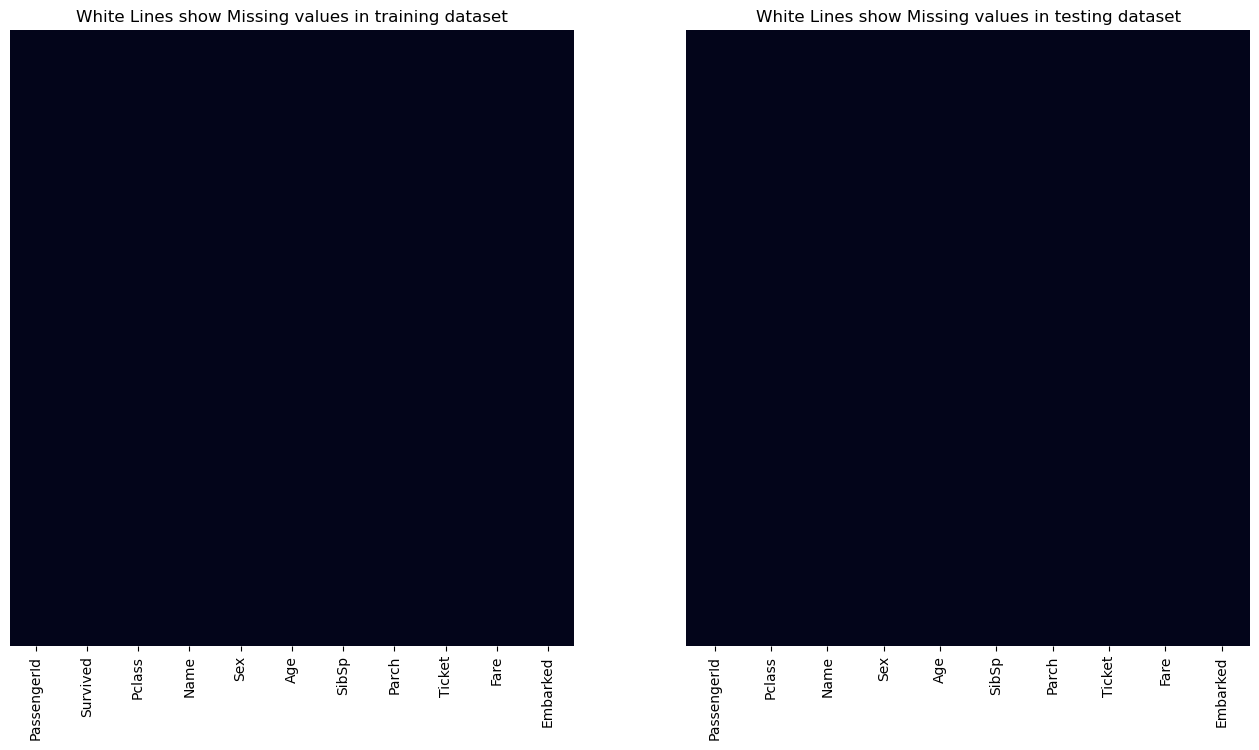

In [18]:
# Let's see the missing values in heatmap again after imputing missing values
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

- `No` missing values left.

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 5 | Check for Duplicates</p>

## 5.1 Duplicates in Training Dataset

In [19]:
df_train.duplicated().sum()

0

### 5.1.1 Observations
- `No duplicates` found in the dataset.

## 5.2 Duplicates in Testing Dataset

In [20]:
df_test.duplicated().sum()

0

### 5.2.1 Observations
- `No duplicates` found in the dataset.

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 6 | Remove Unnecessary Features</p>

## 6.1 Training Dataset

In [21]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [22]:
df_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [23]:
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [24]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

In [25]:
df_test.drop(['Name', 'Ticket'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [26]:
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [27]:
print(f"After cleaning the training dataset we left with {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print('-----------------------------------------------------------------------')
print(f"After cleaning the training dataset we left with {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

After cleaning the training dataset we left with 891 rows and 8 columns.
-----------------------------------------------------------------------
After cleaning the training dataset we left with 418 rows and 8 columns.


# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 7 | Exploratory Data Analysis (EDA)</p>

In [28]:
df_train.sample(4)

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
699         0       3    male  42.0      0      0    7.6500        S
347         1       3  female  28.0      1      0   16.1000        S
400         1       3    male  39.0      0      0    7.9250        S
269         1       1  female  35.0      0      0  135.6333        S

## 7.1 `Survived Column`

In [29]:
# Let's see the value counts of survived
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

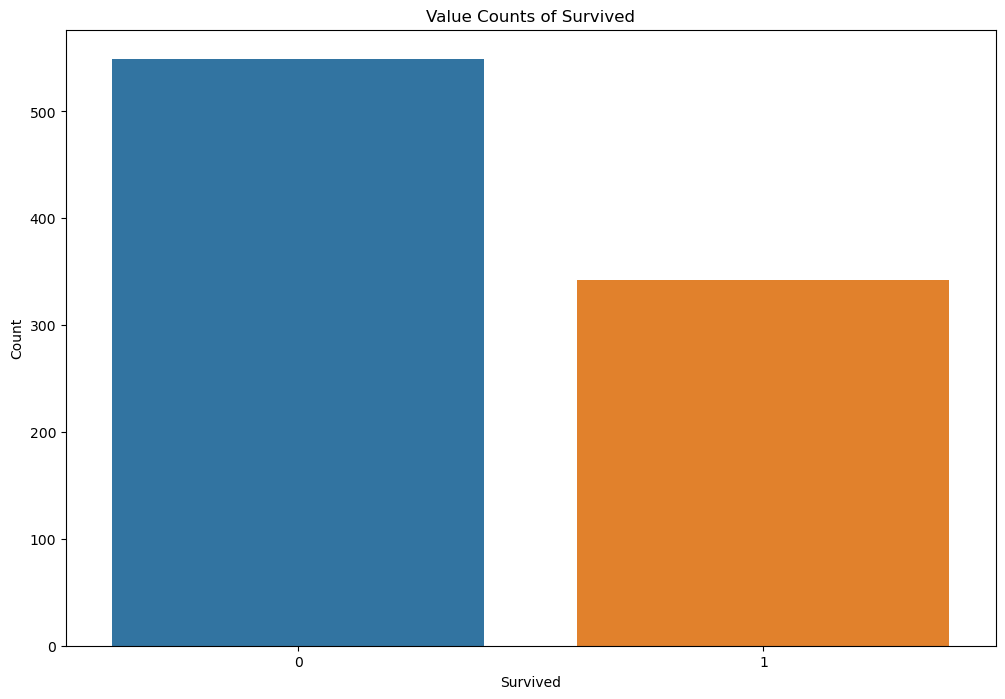

In [30]:
# Let's plot the value counts of the 'Survived' column
plt.figure(figsize=(12, 8))

sns.barplot(x = df_train['Survived'].value_counts().index, y = df_train['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [31]:
# Let's find out the survival rate upto 2 decimal points
not_survived = 549
survived = 342
total = 891

survival_rate = round((not_survived - survived) / not_survived * 100, 2)
print(survival_rate)

37.7


### 7.1.1 Observations
- From the above graph we can see that most of the people `not survived in titanic accident`.
- The `survival rate was 37.30%` in titanic accident.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

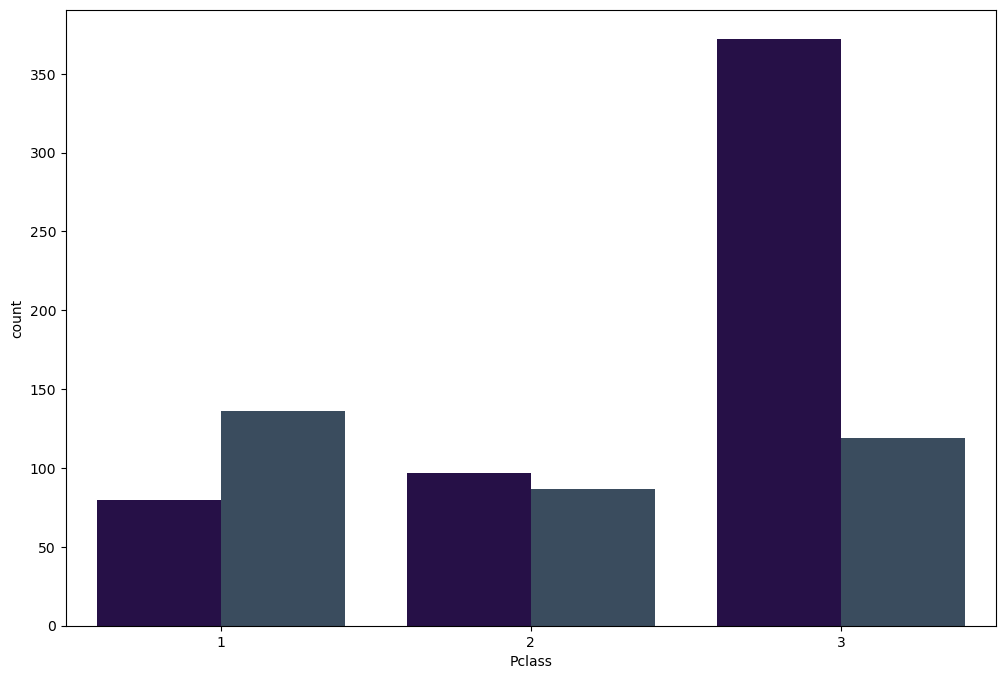

In [32]:
# Let's plot the value counts of the 'Survived' column based on Pclass
plt.figure(figsize=(12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', palette = color)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend(title='Survived', labels = ['Died', 'Survived'])
plt.show()

### 7.1.2 Observations
- `Most` of the people who survived was in `1st Pclass` and most of the people who `not survived was in 3rd Pclass`.

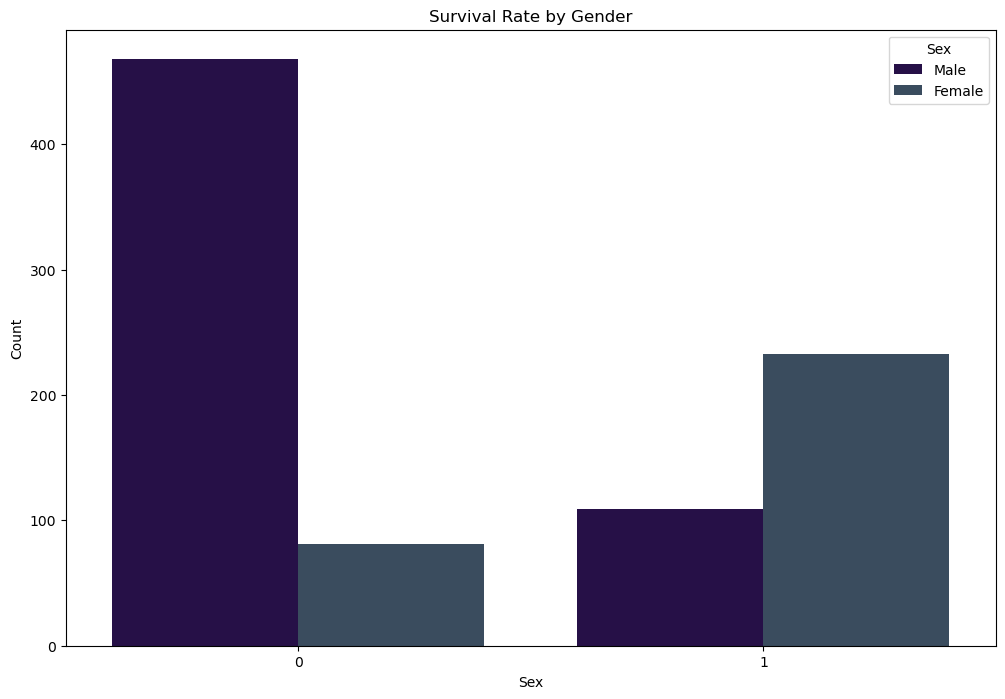

In [33]:
# Let's plot Survived based on Sex column
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(x='Survived', hue='Sex', data=df_train, palette=color)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

### 7.1.3 Observations
- We can see that `most Male not survived` and `most Female survived`.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

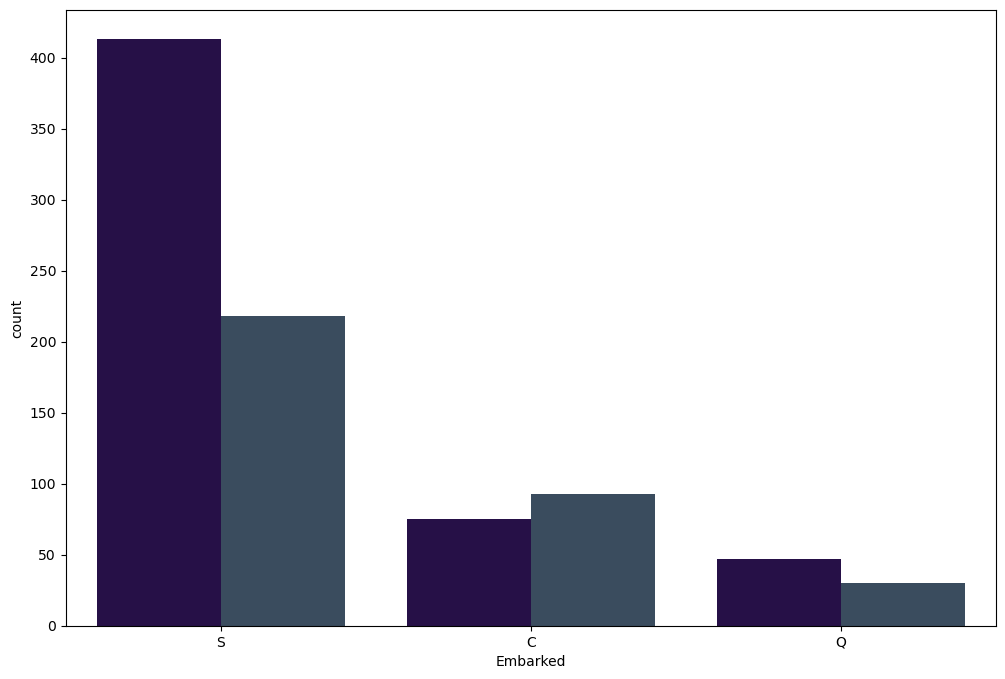

In [77]:
plt.figure(figsize=(12, 8))

# Define color for each class
color_palette = {0: '#240750', 1: '#344C64'}

sns.countplot(data=df_train, x='Embarked', hue='Survived', palette=color_palette)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

### 7.1.4 Observations
- `Most` of the people belonged to `Southampton` and among those `max people not survived`.

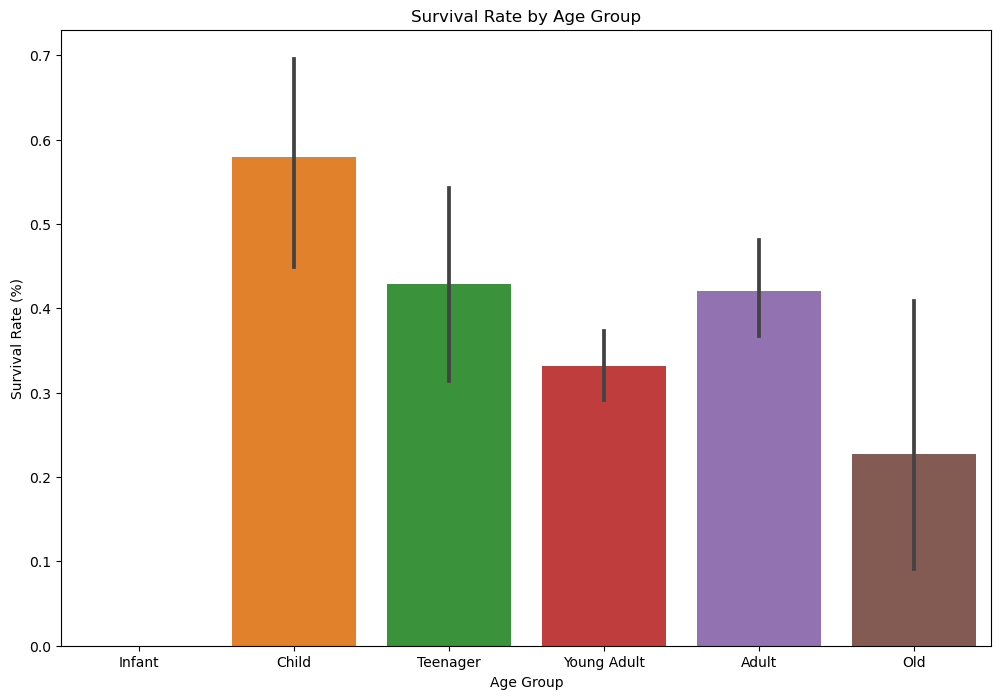

In [35]:
# Let's  plot Survived column based on age
plt.figure(figsize=(12, 8))

# Group the ages into bins
df_train['Age_Group'] = pd.cut(df_train['Age'], bins=[-1, 0, 12, 18, 30, 60, 120], labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Old'])
df_test['Age_Group'] = pd.cut(df_train['Age'], bins=[-1, 0, 12, 18, 30, 60, 120], labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Old'])

# Create the bar plot
sns.barplot(x='Age_Group', y='Survived', data=df_train)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()

### 7.1.5 Observations
- `Survival` rate of `child` were higher.
- `Old` peoples's survival rate was very `low`.

## 7.2 `Pclass Column`

In [36]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

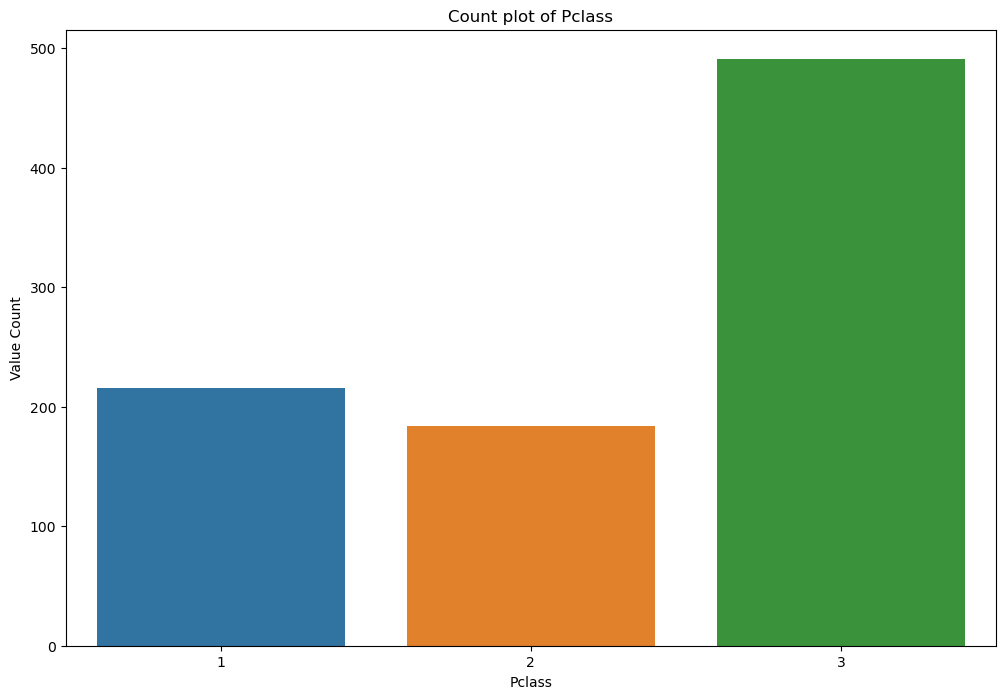

In [37]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Pclass')
plt.title('Count plot of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Value Count')
plt.show()

### 7.2.1 Observations
- `Most` of the people were travelling in `3rd class` of titanic.

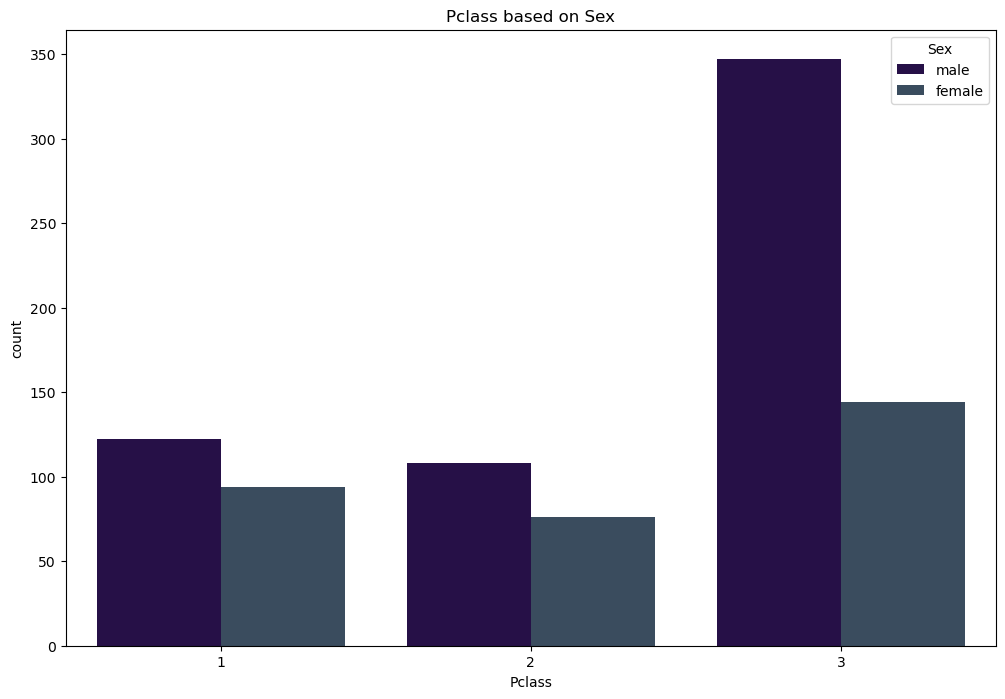

In [38]:
# Let's plot Pclass based on Sex
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(df_train, x = 'Pclass', hue = 'Sex', palette=color)
plt.title('Pclass based on Sex')
plt.show()

### 7.2.2 Observations
- `Most` of the Male and Female both were travelling in `3rd class`.

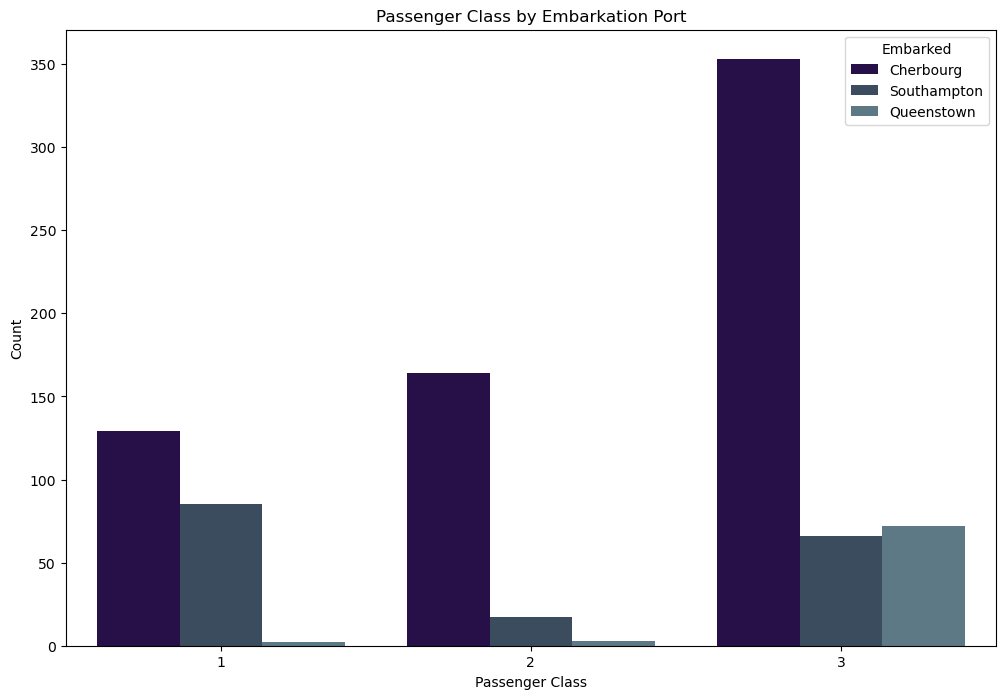

In [39]:
# Let's see the Pclass based on Embarked
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64', '#577B8D']

sns.countplot(x='Pclass', hue='Embarked', data=df_train, palette=color)
plt.title('Passenger Class by Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title = 'Embarked', labels = ['Cherbourg', 'Southampton', 'Queenstown'])
plt.show()

### 7.2.3 Observations
- We can see that most of the people in `3rd class` were from `Cherbourg`.

## 7.3 `Sex Column`

In [40]:
# Let's check the value counts of Sex
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

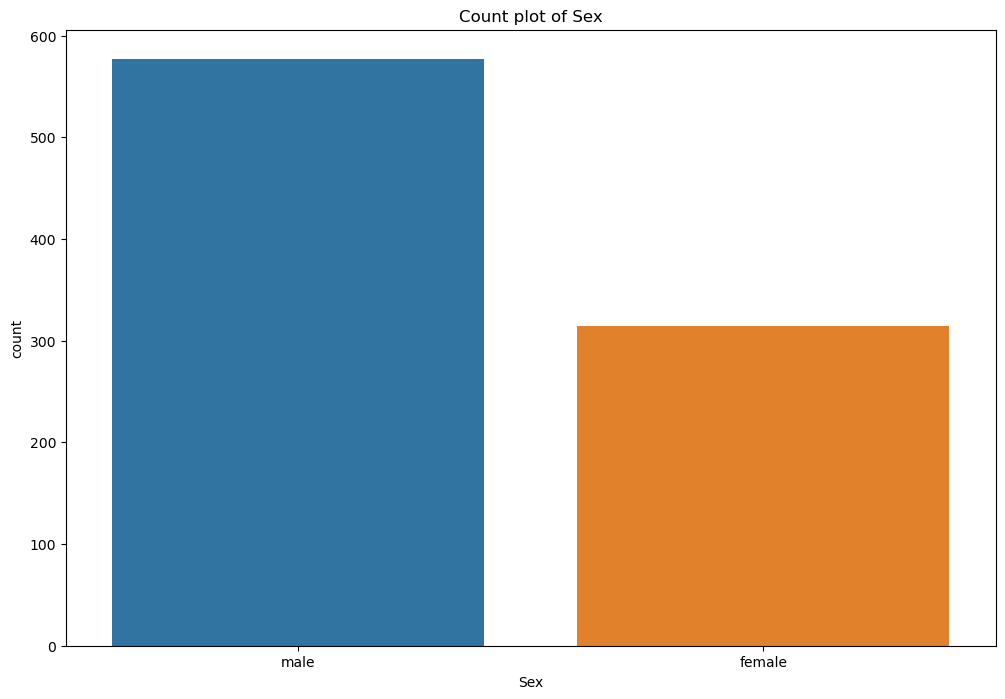

In [41]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Sex')
plt.title('Count plot of Sex')
plt.show()

### 7.3.1 Observation
- `Male` were `larger` in number in titanic.

In [42]:
# Let's check the percentage of male and females upto 2 decimal points
per_male = (891 - 577) / 891 * 100
per_female = (891 - 314) / 891 * 100

print(f"The percentage of males is {round(per_male, 2)}% and female is {round(per_female, 2)}% in the dataset.")

The percentage of males is 35.24% and female is 64.76% in the dataset.


In [43]:
# Let's check how many percent males are higher than females
diff = (577 - 314) / 314 * 100
print(f"Males are {round(diff, 2)}% higher than females.")

Males are 83.76% higher than females.


## 7.4 `Age Column`

In [44]:
# Let's check the maximum and minimum age
df_train['Age'].max(), df_train['Age'].min()

(80.0, 0.42)

### 7.4.1 Observations
- The `maximum age` is `80` years.
- The `minimum` age is `0.42` years.

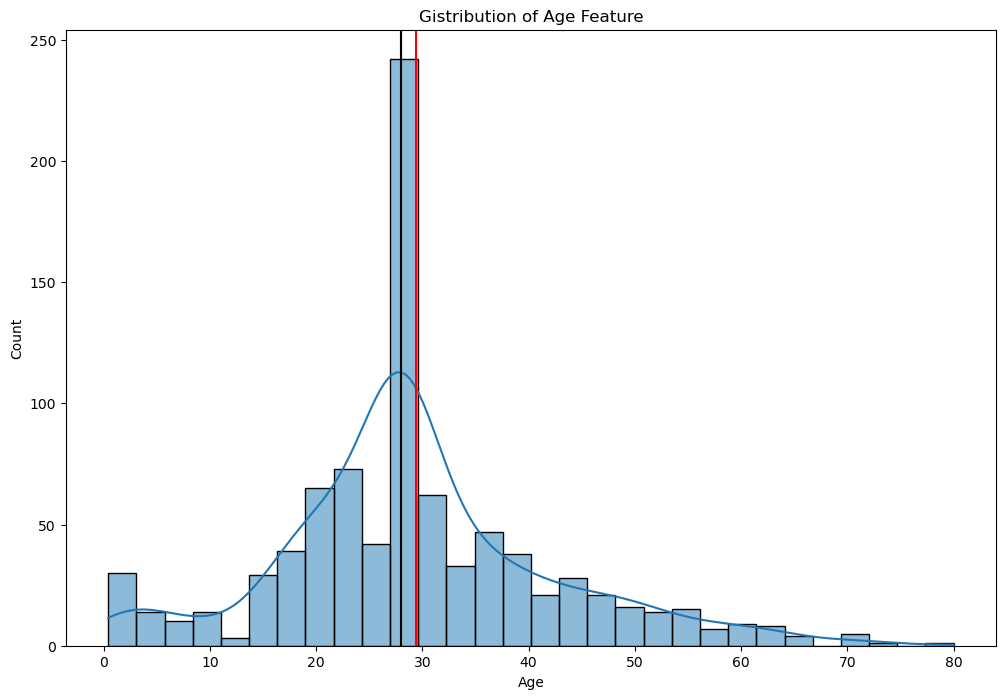

The mean of Age is: 29.36158249158249
The median of Age is: 28.0
The mode of Age is: 28.0


In [45]:
# Let's check the distribution of Age and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Age', kde = True)
plt.title('Gistribution of Age Feature')
plt.axvline(df_train['Age'].mean(), color = 'red')
plt.axvline(df_train['Age'].median(), color = 'green')
plt.axvline(df_train['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Age is: {df_train['Age'].mean()}")
print(f"The median of Age is: {df_train['Age'].median()}")
print(f"The mode of Age is: {df_train['Age'].mode()[0]}")

### 7.4.2 Observation
- `Age` is `normaly` distributed.
- Mean is 29.36.
- Median and Mode are equal and their value is 28.

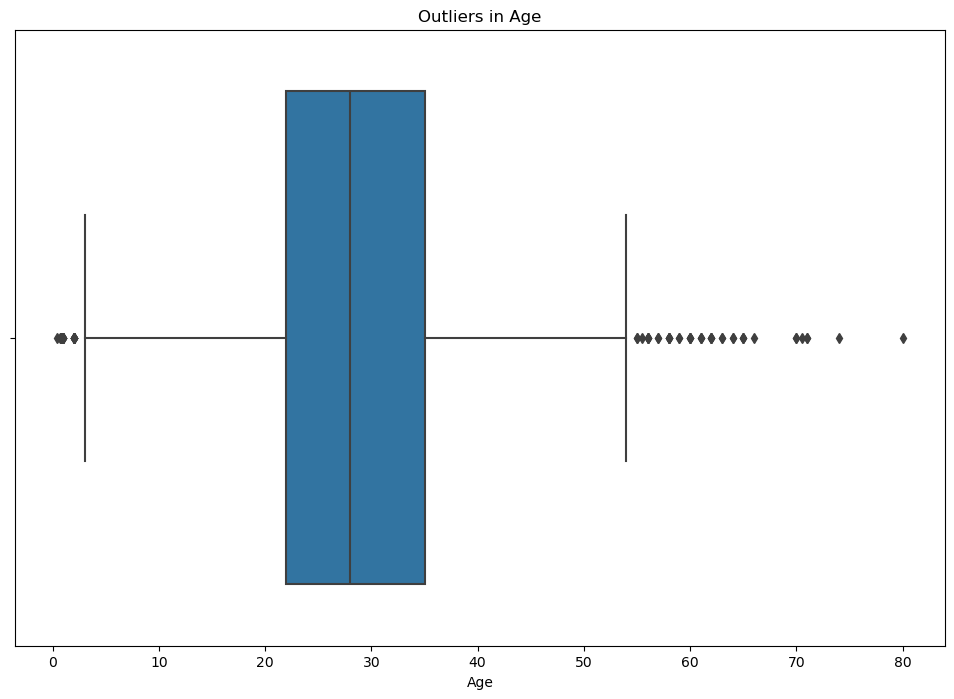

In [46]:
# Let's check outliers in Age
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Age')
plt.title('Outliers in Age')
plt.show()

### 7.4.3 Observations
- `No` outliers in `Age` feature.

## 7.5 `Fare Column`

In [47]:
# Let's check the maximum and minimum Fare
df_train['Fare'].max(), df_train['Fare'].min()

(512.3292, 0.0)

### 7.5.1 Observations
- The `maximum fare` is `512.32`.
- The `minimum fare` is `0`.

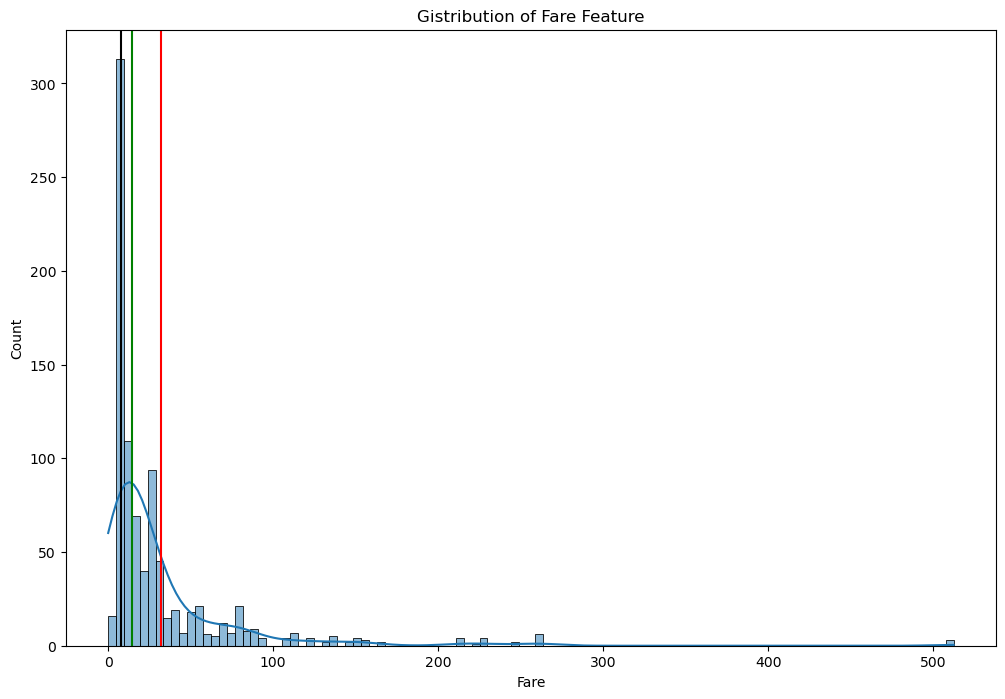

The mean of Fare is: 32.204207968574636
The median of Fare is: 14.4542
The mode of Fare is: 8.05


In [48]:
# Let's check the distribution of fare and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Fare', kde = True)
plt.title('Gistribution of Fare Feature')
plt.axvline(df_train['Fare'].mean(), color = 'red')
plt.axvline(df_train['Fare'].median(), color = 'green')
plt.axvline(df_train['Fare'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Fare is: {df_train['Fare'].mean()}")
print(f"The median of Fare is: {df_train['Fare'].median()}")
print(f"The mode of Fare is: {df_train['Fare'].mode()[0]}")

### 7.5.2 Observation
- `Fare` is `not normaly` distributed.
- `Mean` is `32.20`.
- `Median` is `14.45`.
- `Mode` is `8.05`.

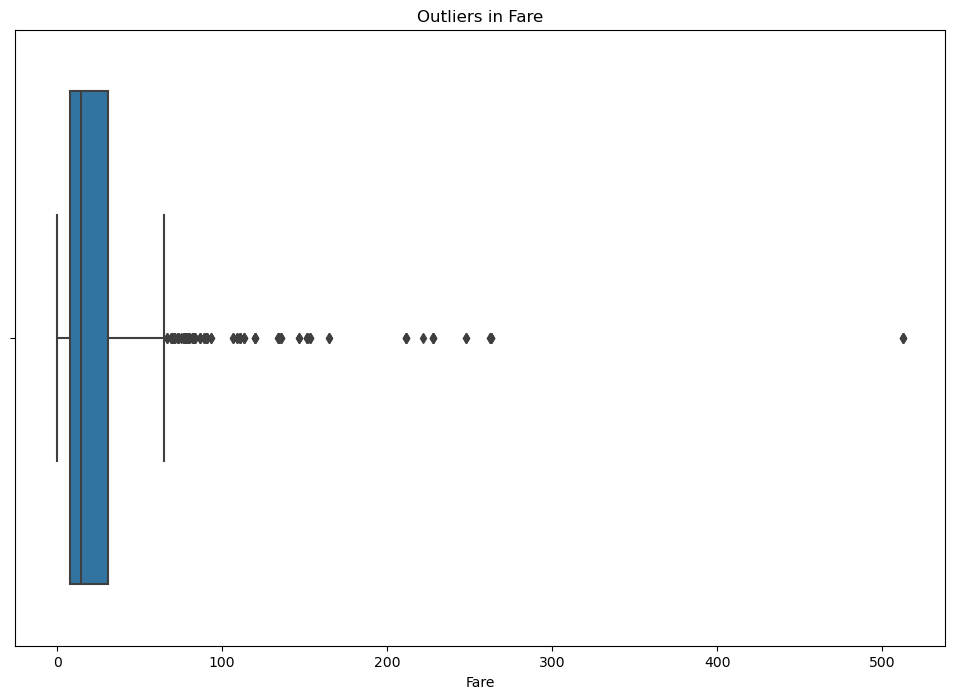

In [49]:

# Let's check outliers in Fare
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Fare')
plt.title('Outliers in Fare')
plt.show()

In [50]:
# Let's check those passengers who paid no Fare in titanic
df_train[df_train['Fare'] == 0]

Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked    Age_Group
179         0       3  male  36.0      0      0   0.0        S        Adult
263         0       1  male  40.0      0      0   0.0        S        Adult
271         1       3  male  25.0      0      0   0.0        S  Young Adult
277         0       2  male  28.0      0      0   0.0        S  Young Adult
302         0       3  male  19.0      0      0   0.0        S  Young Adult
413         0       2  male  28.0      0      0   0.0        S  Young Adult
466         0       2  male  28.0      0      0   0.0        S  Young Adult
481         0       2  male  28.0      0      0   0.0        S  Young Adult
597         0       3  male  49.0      0      0   0.0        S        Adult
633         0       1  male  28.0      0      0   0.0        S  Young Adult
674         0       2  male  28.0      0      0   0.0        S  Young Adult
732         0       2  male  28.0      0      0   0.0        S  Young Adult
806         0       1  male  39.0      0      0   0.0        S        Adult
815         0       1  male  28.0      0      0   0.0        S  Young Adult
822         0       1  male  38.0      0      0   0.0        S        Adult

### 7.5.3 Observations
- We can see that `15 Passengers` are travelling in titanic `without paying` so these are `outliers` because nobody is allowed to travel without paying.

In [51]:
# Filter out the data where Fare = 0
df_train = df_train[df_train['Fare'] != 0]

In [52]:
# Now, again the for those rows whera Fare is 0
df_train[df_train['Fare'] == 0]

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Age_Group]
Index: []

### 7.5.4 Observations
- We `removed` the `outliers` from the `Fare` feature.

## 7.6 `SibSp Column`

In [53]:
# Let's check the value counts of SibSp 
df_train['SibSp'].value_counts()

SibSp
0    593
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

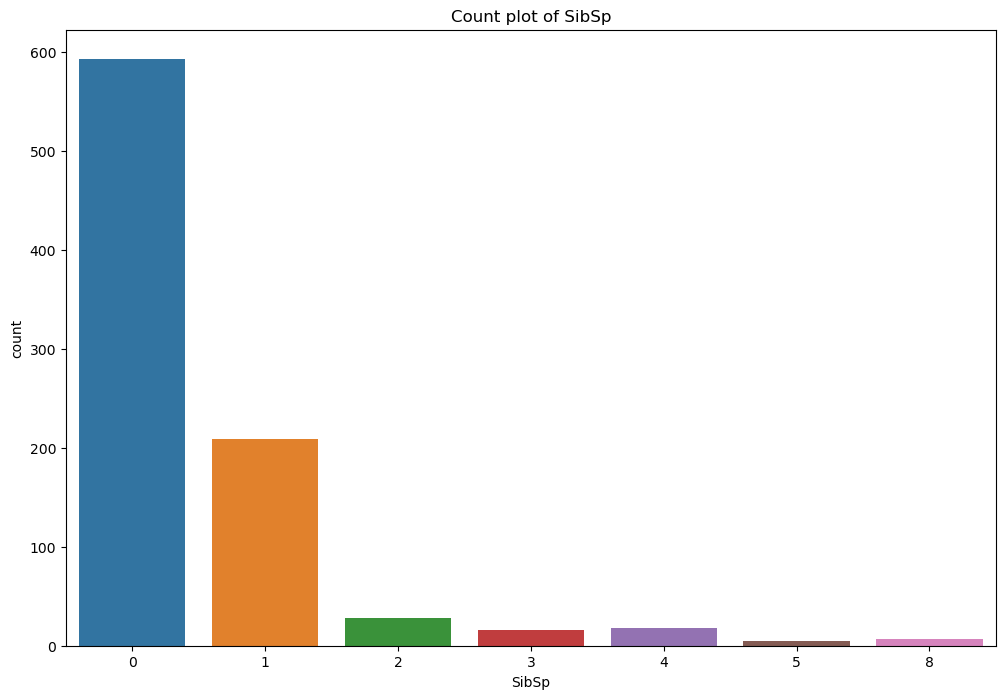

In [54]:
# Let's plot that 
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'SibSp')
plt.title('Count plot of SibSp')
plt.show()

### 7.6.1 Observations
- We can see that `most` of passengers were travelling with `0 SibSp`.

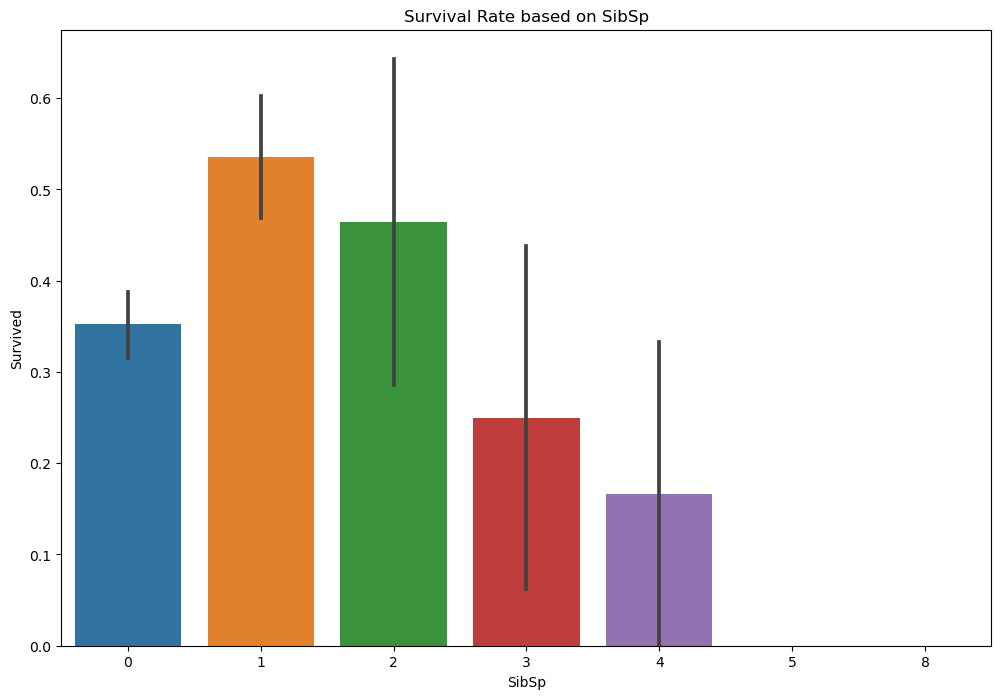

Percentage of SibSp = 0 who survived: 35.24451939291737
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


In [55]:
## Let's check the affect of SibSp on Survived 
plt.figure(figsize = (12, 8))

sns.barplot(df_train, y = 'Survived', x = 'SibSp')
plt.title('Survival Rate based on SibSp')
plt.show()

# Let's print the percentages of survival rate based on SibSp
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", df_train["Survived"][df_train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", df_train["Survived"][df_train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

### 7.6.2 Observations
- `Generally`, it's clear that people with `more siblings` or spouses aboard were less likely to survive. However, `contrary to expectations`, people with no siblings or spouses were less to likely to survive than those with one or two.

In [56]:
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked    Age_Group
0         0       3    male  22.0      1      0   7.2500        S  Young Adult
1         1       1  female  38.0      1      0  71.2833        C        Adult
2         1       3  female  26.0      0      0   7.9250        S  Young Adult
3         1       1  female  35.0      1      0  53.1000        S        Adult
4         0       3    male  35.0      0      0   8.0500        S        Adult

## 7.7 Correlation Matrix

In [57]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_Group'],
      dtype='object')

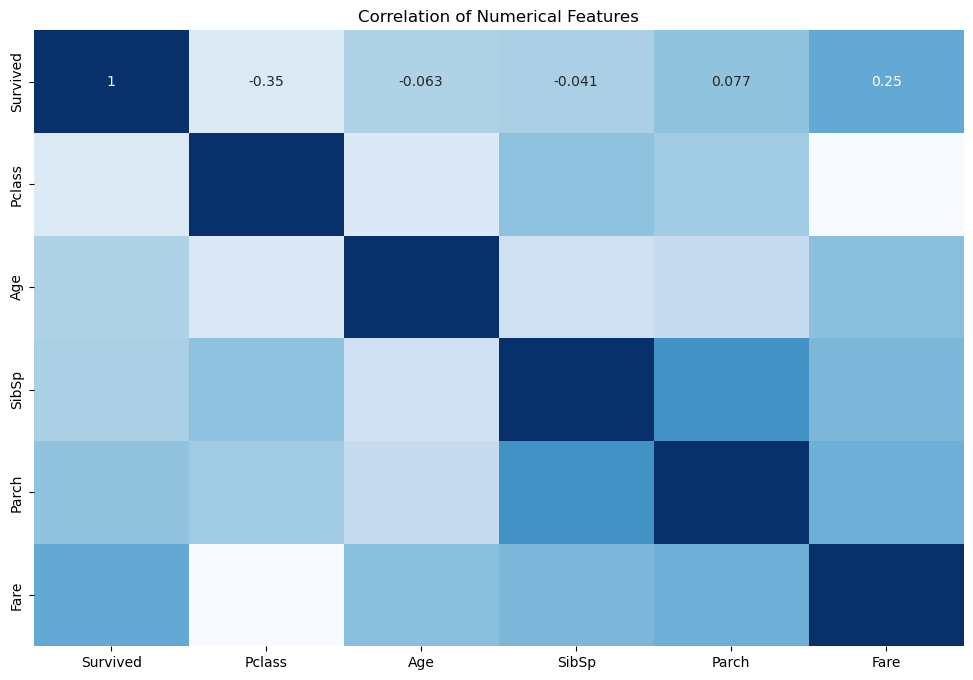

In [58]:
# Let's draw a correlation matrix
plt.figure(figsize = (12, 8))

sns.heatmap(df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True, cbar = False, cmap = 'Blues')
plt.title('Correlation of Numerical Features')
plt.show()

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 8 | Normalization</p>

In [59]:
# We have seen above that our Age Column is not completely normaly distrubuted and Fare Column is right skewwed so now we are going to normalize these two features using Quantile transformer

# Call the Quntile Transformer seperate for each feature because at the end we will inverse transform these features
qun_tra_age = QuantileTransformer(output_distribution = 'normal')
qun_tra_fare = QuantileTransformer(output_distribution = 'normal')

# Fit and transform on training data
df_train['Age'] = qun_tra_age.fit_transform(df_train[['Age']])
df_train['Fare'] = qun_tra_fare.fit_transform(df_train[['Fare']])

# Transform only on testing data
df_test['Age'] = qun_tra_age.transform(df_test[['Age']])
df_test['Fare'] = qun_tra_fare.transform(df_test[['Fare']])


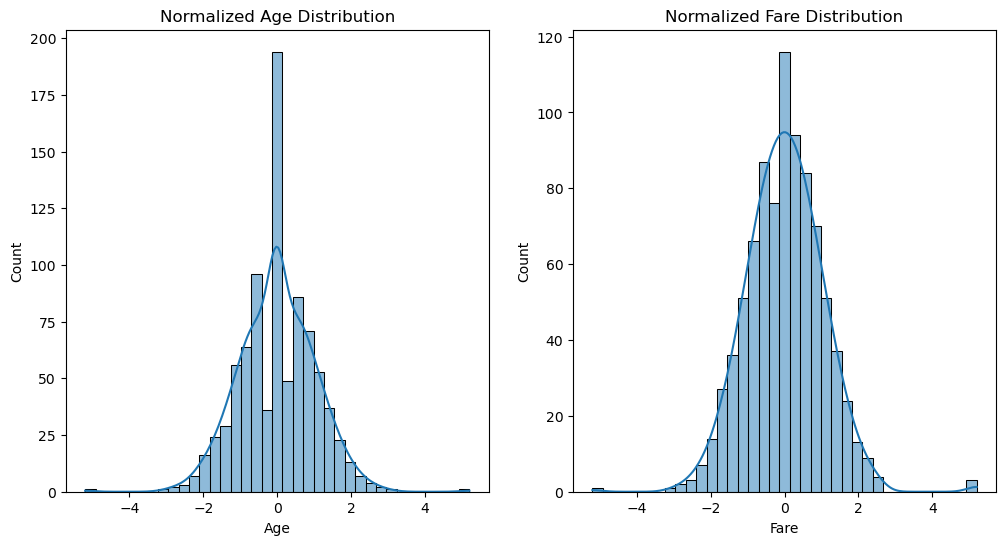

In [60]:
# Now let's plot Age and Fare distribution

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['Age'], kde = True)
plt.title('Normalized Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_train['Fare'], kde = True)
plt.title('Normalized Fare Distribution')

plt.show()


In [61]:
df_train.head()

Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked  \
0         0       3    male -0.686225      1      0 -1.482205        S   
1         1       1  female  0.827418      1      0  1.192302        C   
2         1       3  female -0.381466      0      0 -0.684413        S   
3         1       1  female  0.668209      1      0  0.978150        S   
4         0       3    male  0.668209      0      0 -0.572686        S   

     Age_Group  
0  Young Adult  
1        Adult  
2  Young Adult  
3        Adult  
4        Adult

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 9 | Encoding Categorical Features</p>

In [62]:
# Let's encode Sex, Embarked and Age_Group Column using LabelEncoder
# Call the label encoder seperate because later I will do inverse decoding
lbe_sex = LabelEncoder()
lbe_embarked = LabelEncoder()
lbe_age_group = LabelEncoder()

# Fit and transform on training data
df_train['Sex'] = lbe_sex.fit_transform(df_train['Sex'])
df_train['Embarked'] = lbe_embarked.fit_transform(df_train['Embarked'])
df_train['Age_Group'] = lbe_age_group.fit_transform(df_train['Age_Group'])

# trandform only on testing data
df_test['Sex'] = lbe_sex.transform(df_test['Sex'])
df_test['Embarked'] = lbe_embarked.transform(df_test['Embarked'])
df_test['Age_Group'] = lbe_age_group.transform(df_test['Age_Group'])



In [63]:
df_train.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  \
0         0       3    1 -0.686225      1      0 -1.482205         2   
1         1       1    0  0.827418      1      0  1.192302         0   
2         1       3    0 -0.381466      0      0 -0.684413         2   
3         1       1    0  0.668209      1      0  0.978150         2   
4         0       3    1  0.668209      0      0 -0.572686         2   

   Age_Group  
0          4  
1          0  
2          4  
3          0  
4          0

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 10 | Scaling the Dataset</p>

In [64]:
# Let's scale our data into same units using MinMaxScalar
# Call the Scalar seperate for each feature because we will inverse transform later
mms_survived = MinMaxScaler()
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()
mms_age_group = MinMaxScaler()

# Fit and transform on training data
df_train['Pclass'] = mms_pclass.fit_transform(df_train[['Pclass']])
df_train['Sex'] = mms_sex.fit_transform(df_train[['Sex']])
df_train['Age'] = mms_age.fit_transform(df_train[['Age']])
df_train['SibSp'] = mms_sibsp.fit_transform(df_train[['SibSp']])
df_train['Parch'] = mms_parch.fit_transform(df_train[['Parch']])
df_train['Fare'] = mms_fare.fit_transform(df_train[['Fare']])
df_train['Embarked'] = mms_embarked.fit_transform(df_train[['Embarked']])
df_train['Age_Group'] = mms_age_group.fit_transform(df_train[['Age_Group']])

# Transform only on testing data
df_test['Pclass'] = mms_pclass.transform(df_test[['Pclass']])
df_test['Sex'] = mms_sex.transform(df_test[['Sex']])
df_test['Age'] = mms_age.transform(df_test[['Age']])
df_test['SibSp'] = mms_sibsp.transform(df_test[['SibSp']])
df_test['Parch'] = mms_parch.transform(df_test[['Parch']])
df_test['Fare'] = mms_fare.transform(df_test[['Fare']])
df_test['Embarked'] = mms_embarked.transform(df_test[['Embarked']])
df_test['Age_Group'] = mms_age_group.transform(df_test[['Age_Group']])


In [65]:
# Now, let's see how our data looks like
df_train.sample(5)

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked  \
454         0     1.0  1.0  0.498347  0.000  0.000000  0.444927       1.0   
126         0     1.0  1.0  0.498347  0.000  0.000000  0.388368       0.5   
629         0     1.0  1.0  0.498347  0.000  0.000000  0.375495       0.5   
34          0     0.0  1.0  0.498347  0.125  0.000000  0.634020       0.0   
145         0     0.5  1.0  0.408783  0.125  0.166667  0.574073       1.0   

     Age_Group  
454        1.0  
126        1.0  
629        1.0  
34         1.0  
145        1.0

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 11 | Machine Learning (ML)</p>

In [66]:
# Droping Age_Group feature because it will not enhance accuracy of the model
train_df = df_train.drop(['Age_Group'], axis = 1)

In [67]:
train_df.sample(2)

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
254         0     1.0  0.0  0.593843  0.000  0.333333  0.517311       1.0
63          0     1.0  1.0  0.331002  0.375  0.333333  0.552816       1.0

In [68]:
# Seperating the df into Features (X) and Labels (y)
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

In [69]:
# Split the dat ainto train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:


# Define a dictionary of classification models and their hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1],
            'model__max_iter': [1000]
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10]
        }
    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'AdaBoost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7]
        }
    },
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3]
        }
    },
    'CatBoost Classifier': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'Naive Bayes Classifier': {
        'model': BernoulliNB(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0]
        }
    }
}

# Initialize lists to store model performance metrics
model_scores = []
best_accuracy = 0
best_estimator = None

# Loop through each classification model
for name, model_info in models.items():
    # Create a pipeline with data scaling and the model
    pipeline = Pipeline([
        ('model', model_info['model'])
    ])

    # Initialize RandomizedSearchCV with the model's hyperparameter grid
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info['params'],
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1,
    )

    # Fit the RandomizedSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    # Predict the target variable for the test set
    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    # Append performance metrics of the current model to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy
    })

    # Update the best model if the current model has a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_estimator = grid_search.best_estimator_

# Sort the models based on their name
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=True)
# Convert sorted model performances to a DataFrame
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Print the classification models performance
print("Classification Models Performance")
print(metrics.round(2))

# Print the best model's performance metrics
print('---------------------------------------------------')
print("BEST CLASSIFICATION MODEL")
print(f"Model: {best_clf_model['Model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")

# Extract the best model from the best_estimator
best_model = best_estimator.named_steps['model']

# Get the parameters of the best model
best_params = best_model.get_params()

# Create a new pipeline with the model using the best parameters
new_pipeline = Pipeline([
    ('model', best_params)
])

/home/pratham2810/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/pratham2810/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/pratham2810/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/pratham2810/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

Classification Models Performance
                             Model  Accuracy
0               XGBoost Classifier      0.77
1        Support Vector Classifier      0.81
2         Random Forest Classifier      0.82
3           Naive Bayes Classifier      0.76
4              Logistic Regression      0.76
5   K-Nearest Neighbors Classifier      0.75
6     Gradient Boosting Classifier      0.78
7                       GaussianNB      0.72
8         Decision Tree Classifier      0.76
9              CatBoost Classifier      0.81
10             AdaBoost Classifier      0.77
---------------------------------------------------
BEST CLASSIFICATION MODEL
Model: Random Forest Classifier
Accuracy: 0.82


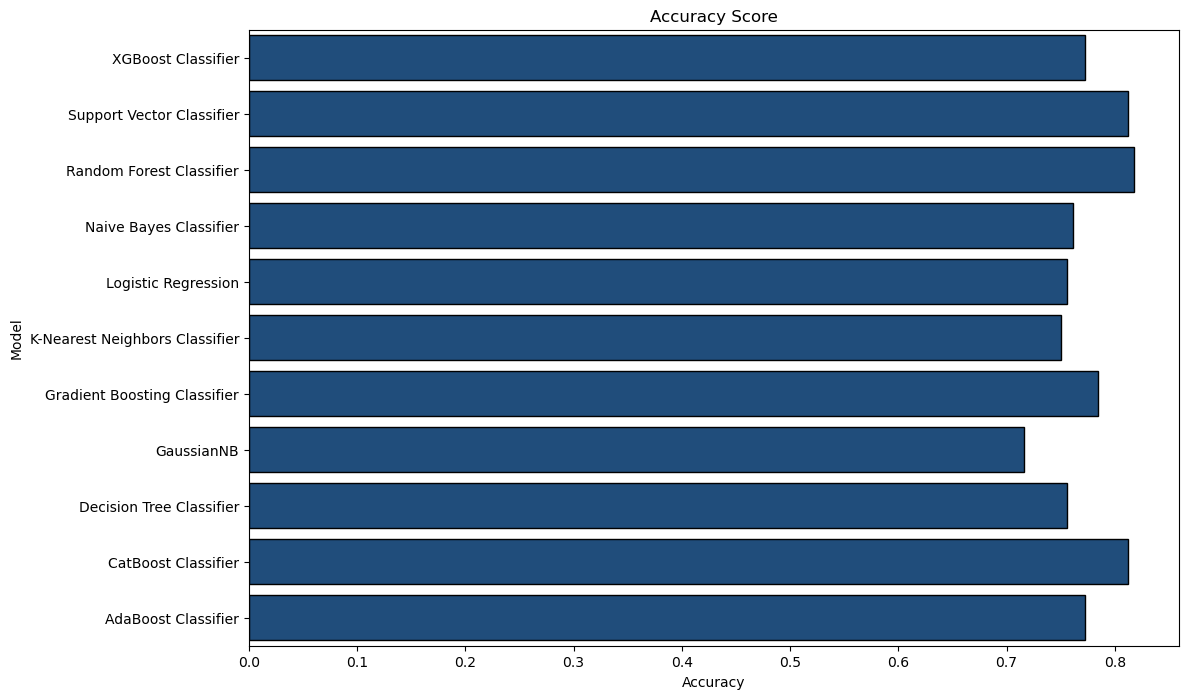

In [71]:
# Make bar plots for the model performance metrics
plt.figure(figsize=(12, 8))

sns.barplot(data=metrics, y='Model', x='Accuracy', color='#114d8a', edgecolor='black')
plt.xticks(rotation=0)
plt.title('Accuracy Score')
plt.show()

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 12 | Inverse Transformation</p>

## 12.1 Inverse Transformation of Scaling

In [72]:
# Let's first inverse transform the scaling

# Inverse transform on training data
df_train['Pclass'] = mms_pclass.inverse_transform(df_train[['Pclass']])
df_train['Sex'] = mms_sex.inverse_transform(df_train[['Sex']])
df_train['Age'] = mms_age.inverse_transform(df_train[['Age']])
df_train['SibSp'] = mms_sibsp.inverse_transform(df_train[['SibSp']])
df_train['Parch'] = mms_parch.inverse_transform(df_train[['Parch']])
df_train['Fare'] = mms_fare.inverse_transform(df_train[['Fare']])
df_train['Embarked'] = mms_embarked.inverse_transform(df_train[['Embarked']])
df_train['Age_Group'] = mms_age_group.inverse_transform(df_train[['Age_Group']])

# Inverse transform on testing data
df_test['Pclass'] = mms_pclass.inverse_transform(df_test[['Pclass']])
df_test['Sex'] = mms_sex.inverse_transform(df_test[['Sex']])
df_test['Age'] = mms_age.inverse_transform(df_test[['Age']])
df_test['SibSp'] = mms_sibsp.inverse_transform(df_test[['SibSp']])
df_test['Parch'] = mms_parch.inverse_transform(df_test[['Parch']])
df_test['Fare'] = mms_fare.inverse_transform(df_test[['Fare']])
df_test['Embarked'] = mms_embarked.inverse_transform(df_test[['Embarked']])
df_test['Age_Group'] = mms_age_group.inverse_transform(df_test[['Age_Group']])

In [73]:
df_train.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  \
0         0     3.0  1.0 -0.686225    1.0    0.0 -1.482205       2.0   
1         1     1.0  0.0  0.827418    1.0    0.0  1.192302       0.0   
2         1     3.0  0.0 -0.381466    0.0    0.0 -0.684413       2.0   
3         1     1.0  0.0  0.668209    1.0    0.0  0.978150       2.0   
4         0     3.0  1.0  0.668209    0.0    0.0 -0.572686       2.0   

   Age_Group  
0        4.0  
1        0.0  
2        4.0  
3        0.0  
4        0.0

## 12.2 Inverse Encoding 

In [74]:
# Check the data types
print(df_train['Sex'].dtype)
print(df_test['Sex'].dtype)
print(df_train['Embarked'].dtype)
print(df_test['Embarked'].dtype)
print(df_train['Age_Group'].dtype)
print(df_test['Age_Group'].dtype)

# Convert the data types to integer
df_train['Sex'] = df_train['Sex'].astype(int)
df_test['Sex'] = df_test['Sex'].astype(int)
df_train['Embarked'] = df_train['Embarked'].astype(int)
df_test['Embarked'] = df_test['Embarked'].astype(int)
df_train['Age_Group'] = df_train['Age_Group'].astype(int)
df_test['Age_Group'] = df_test['Age_Group'].astype(int)

# Fit and transform on training data
df_train['Sex'] = lbe_sex.inverse_transform(df_train['Sex'])
df_train['Embarked'] = lbe_embarked.inverse_transform(df_train['Embarked'])
df_train['Age_Group'] = lbe_age_group.inverse_transform(df_train['Age_Group'])

# Transform only on testing data
df_test['Sex'] = lbe_sex.inverse_transform(df_test['Sex'])
df_test['Embarked'] = lbe_embarked.inverse_transform(df_test['Embarked'])
df_test['Age_Group'] = lbe_age_group.inverse_transform(df_test['Age_Group'])

float64
float64
float64
float64
float64
float64


## 12.3 Inverse Transformation of Normalization


In [75]:
# Inverse transformation on training data
df_train['Age'] = qun_tra_age.inverse_transform(df_train[['Age']])
df_train['Fare'] = qun_tra_fare.inverse_transform(df_train[['Fare']])

# Inverse transformation only on testing data
df_test['Age'] = qun_tra_age.inverse_transform(df_test[['Age']])
df_test['Fare'] = qun_tra_fare.inverse_transform(df_test[['Fare']])

In [76]:
df_train.sample(4)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
661         0     3.0    male  40.0    0.0    0.0   7.2250        C   
399         1     2.0  female  28.0    0.0    0.0  12.6500        S   
169         0     3.0    male  28.0    0.0    0.0  56.4958        S   
827         1     2.0    male   1.0    0.0    2.0  37.0042        C   

       Age_Group  
661        Adult  
399  Young Adult  
169  Young Adult  
827        Child

# <p style="background-color:#06025c;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Step 13 | Conclusions</p>

In this comprehensive analysis, I explored the Titanic dataset through extensive Exploratory Data Analysis (EDA) to gain a deep understanding of the underlying patterns and characteristics of the data. Based on the insights gained from the EDA, I carefully `selected 11 diverse machine learning models to evaluate the dataset` and `identify the best-performing algorithm`. After thoroughly `tuning the hyperparameters of each model`, the` SVMClassifier emerged as the top-performing model`, achieving an `impressive accuracy of 81%`.

